In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
!pip install -q memory_profiler

In [43]:
import numpy as np
from memory_profiler import memory_usage
import time, gc
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import mixed_precision
from keras import backend as K

In [44]:
!pip install psutil

In [45]:
#activate mix precision float16
from keras import backend as K
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

policy = mixed_precision.global_policy()
print(f"Current policy: {policy}")
print(f"Compute dtype: {policy.compute_dtype}")
print(f"Variable dtype: {policy.variable_dtype}")

Current policy: <DTypePolicy "mixed_float16">
Compute dtype: float16
Variable dtype: float32


In [18]:
mixed_precision.set_global_policy('float32')
K.set_floatx('float32')

In [37]:
mixed_precision.set_global_policy('float32')  # Reset policy
K.set_floatx('float64')

In [ ]:
# Define the emotion code mapping
emotion_mapping = {
    'ANG': 'Anger',
    'DIS': 'Disgust',
    'FEA': 'Fear',
    'HAP': 'Happy',
    'NEU': 'Neutral',
    'SAD': 'Sad'
}



In [ ]:
import os


sorted_dir = '/content/drive/MyDrive/Colab Notebooks/OS'


for emotion in emotion_mapping.values():
    os.makedirs(os.path.join(sorted_dir, emotion), exist_ok=True)

In [ ]:
import shutil


source_dir = '/content/drive/MyDrive/Colab Notebooks/Sound_Mood/AudioWAV'


for file_name in os.listdir(source_dir):

    for code, emotion in emotion_mapping.items():
        if code in file_name:

            source_path = os.path.join(source_dir, file_name)
            dest_path = os.path.join(sorted_dir, emotion, file_name)


            shutil.move(source_path, dest_path)
            print(f'Moved {file_name} to {emotion} folder')
            break

Streaming output truncated to the last 5000 lines.
Moved 1060_IWW_ANG_XX.wav to Anger folder
Moved 1060_ITH_HAP_XX.wav to Happy folder
Moved 1060_IWW_NEU_XX.wav to Neutral folder
Moved 1060_IWW_HAP_XX.wav to Happy folder
Moved 1060_IOM_FEA_XX.wav to Fear folder
Moved 1060_ITH_FEA_XX.wav to Fear folder
Moved 1061_IEO_ANG_LO.wav to Anger folder
Moved 1061_ITS_FEA_XX.wav to Fear folder
Moved 1061_ITS_DIS_XX.wav to Disgust folder
Moved 1061_IEO_SAD_HI.wav to Sad folder
Moved 1061_IEO_HAP_HI.wav to Happy folder
Moved 1061_IEO_FEA_MD.wav to Fear folder
Moved 1061_IEO_SAD_MD.wav to Sad folder
Moved 1061_IOM_FEA_XX.wav to Fear folder
Moved 1061_ITS_ANG_XX.wav to Anger folder
Moved 1061_IEO_FEA_HI.wav to Fear folder
Moved 1060_WSI_NEU_XX.wav to Neutral folder
Moved 1061_IOM_HAP_XX.wav to Happy folder
Moved 1061_ITH_ANG_XX.wav to Anger folder
Moved 1061_IEO_HAP_MD.wav to Happy folder
Moved 1061_ITS_NEU_XX.wav to Neutral folder
Moved 1061_IEO_ANG_MD.wav to Anger folder
Moved 1061_ITH_DIS_XX.wav t

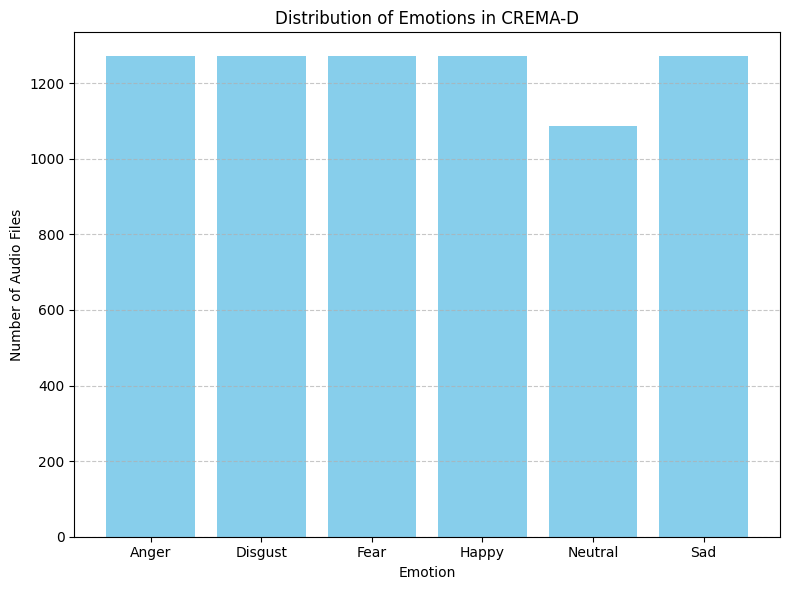

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_dir = "/content/drive/MyDrive/Colab Notebooks/OS"

emotions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']
emotion_counts = {}

for emotion in emotions:
    folder_path = os.path.join(base_dir, emotion)
    count = len([f for f in os.listdir(folder_path) if f.endswith('.wav')])
    emotion_counts[emotion] = count

df = pd.DataFrame(list(emotion_counts.items()), columns=['Emotion', 'Count'])

plt.figure(figsize=(8, 6))
plt.bar(df['Emotion'], df['Count'], color='skyblue')
plt.title('Distribution of Emotions in CREMA-D')
plt.xlabel('Emotion')
plt.ylabel('Number of Audio Files')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
import os
import pandas as pd

base_dir = "/content/drive/MyDrive/Colab Notebooks/OS"

emotions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

data = []

for emotion in emotions:
    emotion_folder = os.path.join(base_dir, emotion)
    for file in os.listdir(emotion_folder):
        if file.endswith('.wav'):
            full_path = os.path.join(emotion_folder, file)

            # Extract parts from filename
            name_parts = file.replace('.wav', '').split('_')
            actor_id = name_parts[0]
            sentence_id = name_parts[1]
            emotion_code = name_parts[2]

            data.append({
                "ActorID": actor_id,
                "SentenceID": sentence_id,
                "EmotionCode": emotion_code,
                "Emotions": emotion.lower(),
                "Path": full_path
            })


data_path = pd.DataFrame(data)

print(data_path.head())


  ActorID SentenceID EmotionCode Emotions  \
0    1020        TSI         ANG    anger   
1    1020        MTI         ANG    anger   
2    1020        WSI         ANG    anger   
3    1020        IWW         ANG    anger   
4    1020        ITS         ANG    anger   

                                                Path  
0  /content/drive/MyDrive/Colab Notebooks/OS/Ange...  
1  /content/drive/MyDrive/Colab Notebooks/OS/Ange...  
2  /content/drive/MyDrive/Colab Notebooks/OS/Ange...  
3  /content/drive/MyDrive/Colab Notebooks/OS/Ange...  
4  /content/drive/MyDrive/Colab Notebooks/OS/Ange...  


In [48]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

def create_waveshow(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


🔊 Emotion: Anger


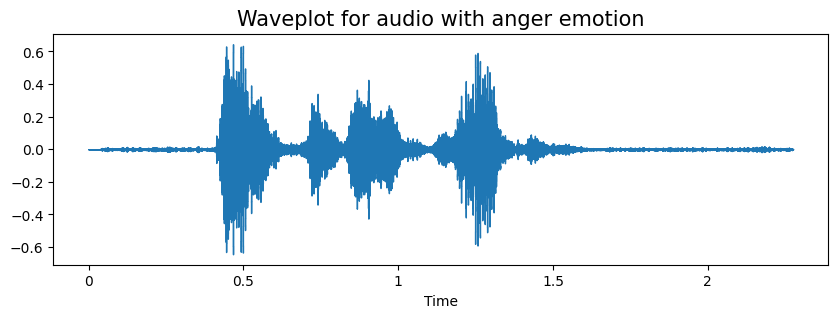


🔊 Emotion: Disgust


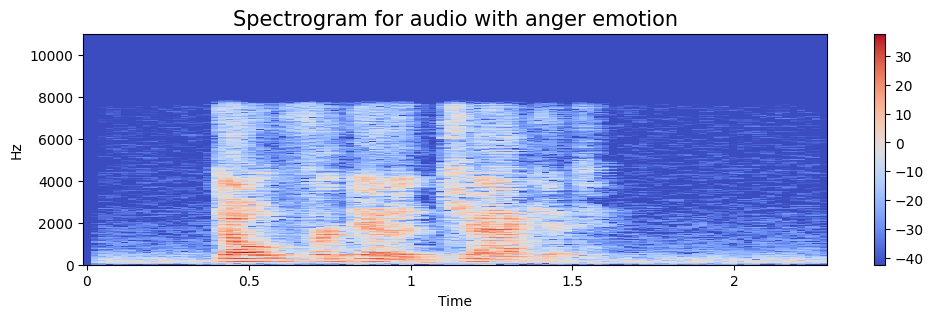

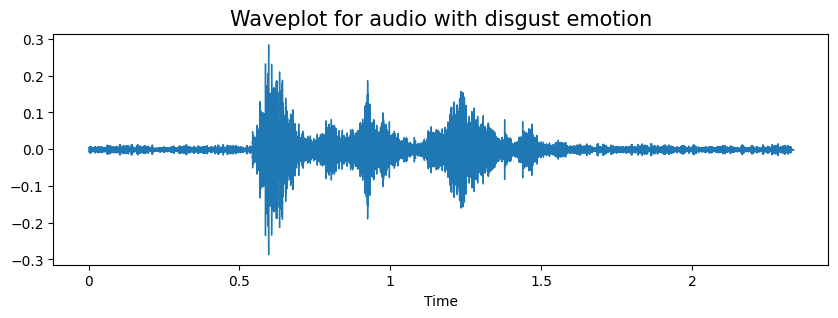


🔊 Emotion: Fear


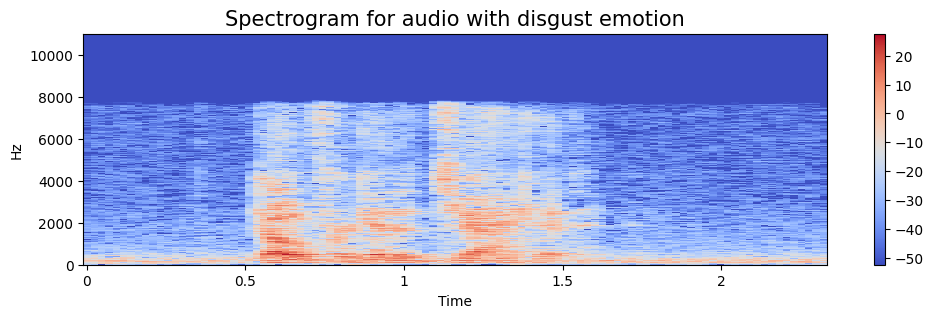

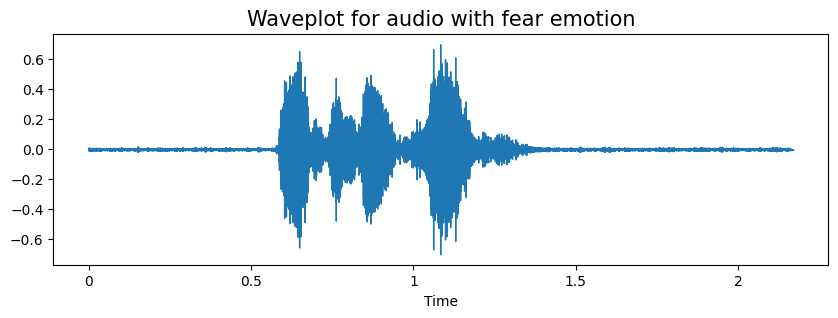


🔊 Emotion: Happy


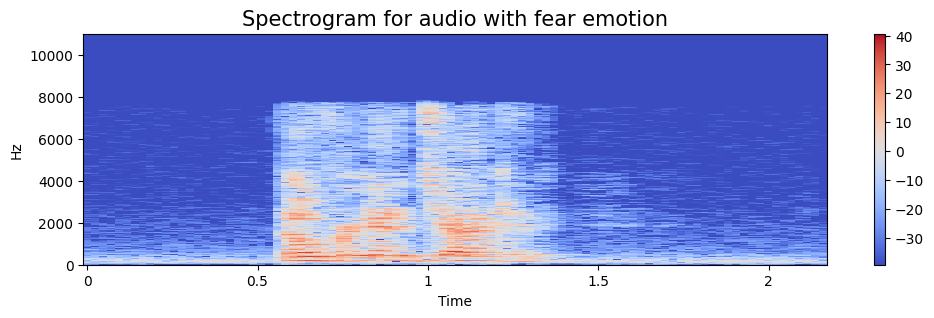

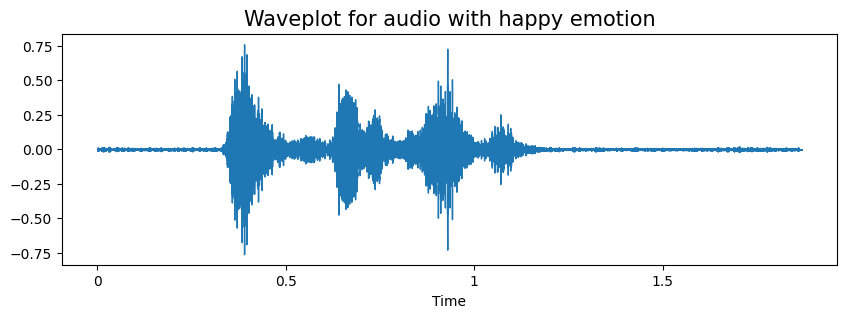


🔊 Emotion: Neutral


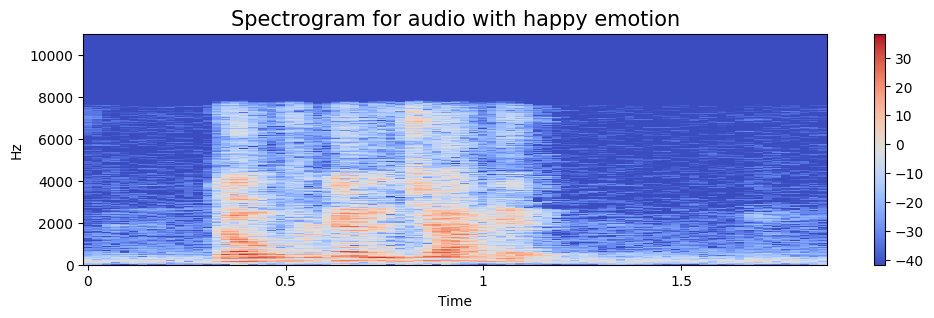

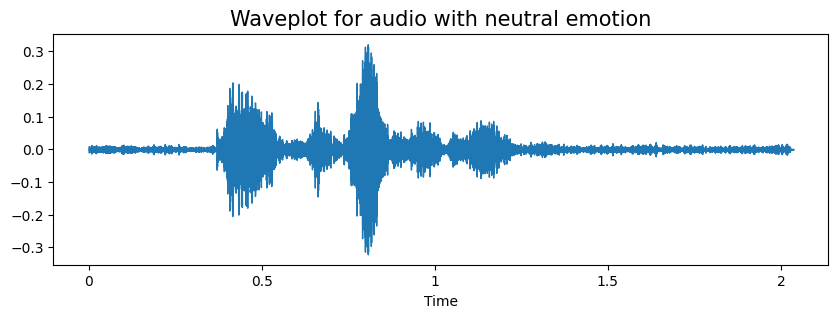


🔊 Emotion: Sad


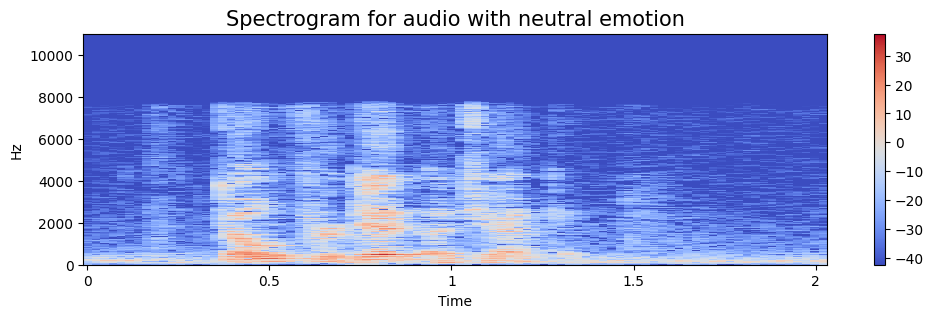

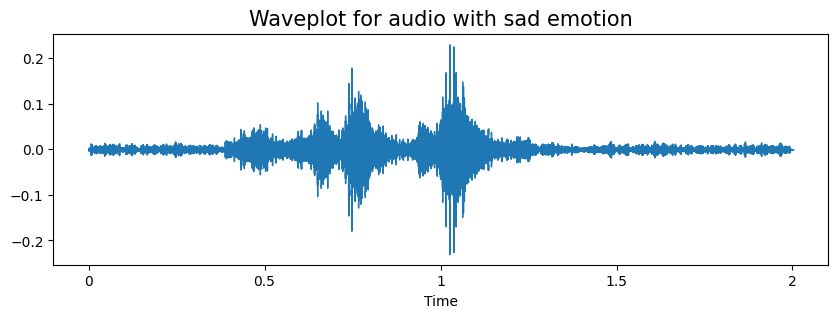

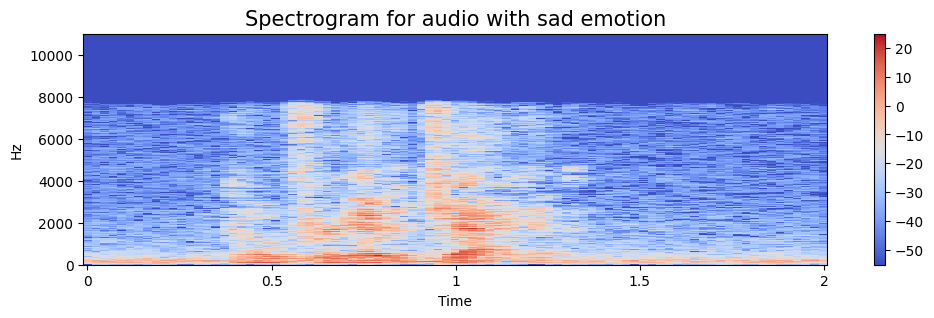

In [49]:

from IPython.display import Audio

example_group = data_path[(data_path.ActorID == '1001') & (data_path.SentenceID == 'DFA')]

for idx, row in example_group.iterrows():
    data, sample_rate = librosa.load(row["Path"])
    print(f"\n🔊 Emotion: {row['Emotions'].capitalize()}")
    create_waveshow(data, sample_rate, row['Emotions'])
    create_spectrogram(data, sample_rate, row['Emotions'])
    display(Audio(row["Path"]))

In [ ]:
# def extract_features(data):
#     result = np.array([])
#     # ZCR
#     result = np.array([])
#     zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
#     result=np.hstack((result, zcr)) # stacking horizontally

#     # Chroma_stft
#     stft = np.abs(librosa.stft(data))
#     chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
#     result = np.hstack((result, chroma_stft)) # stacking horizontally

#     # MFCC
#     # Knowledge from https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225
#     mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
#     result = np.hstack((result, mfcc)) # stacking horizontally

#     # Root Mean Square Value
#     # #knowledge from https://mixandmastermysong.com/understanding-rms-in-audio/
#     rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
#     result = np.hstack((result, rms)) # stacking horizontally

#     # MelSpectogram
#     mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
#     result = np.hstack((result, mel)) # stacking horizontally

#     return result


#     # # MFCC
#     # # Knowledge from https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225
#     # mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
#     # result = np.hstack((result, mfcc)) # stacking horizontally

#     # # Root Mean Square Value
#     # #knowledge from https://mixandmastermysong.com/understanding-rms-in-audio/
#     # rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
#     # result = np.hstack((result, rms)) # stacking horizontally

#     # # MelSpectogram
#     # mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
#     # result = np.hstack((result, mel)) # stacking horizontally

#     # return result

# def get_features(path):
#     # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
#     data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

#     # without augmentation
#     res1 = extract_features(data)
#     result = np.array(res1)

#     return result

In [50]:
import psutil
import os

def get_memory_usage():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # in bytes
    return mem / (1024 ** 2)  # convert to MB

In [51]:
def extract_features_unoptimized(data):
    global sample_rate
    result = np.array([])

    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # RMS
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result

def extract_features_optimized(data):
    global sample_rate
    features = []

    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    features.append(zcr)

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    features.append(chroma_stft)

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    features.append(mfcc)

    # RMS
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    features.append(rms)

    # MelSpectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    features.append(mel)

    result = np.hstack(features)

    return result

In [52]:
def get_features_unoptimized(path):
    global sample_rate
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = extract_features_unoptimized(data)
    return result

def get_features_optimized(path):
    global sample_rate
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = extract_features_optimized(data)
    return result

In [ ]:
#NOT USE NO THREADING, TAKES VERY LONG
# X, Y = [], []

# start_time = time.time()
# start_memory = get_memory_usage()

# for path, emotion in zip(data_path.Path, data_path.Emotions):
#     feature = get_features(path)  # returns a single feature vector
#     X.append(feature)
#     Y.append(emotion)

# end_time = time.time()
# end_memory = get_memory_usage()

# # Report
# print(f"Execution Time: {end_time - start_time:.2f} seconds")
# print(f"Memory Used: {end_memory - start_memory:.2f} MB")

/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Execution Time: 2871.90 seconds
Memory Used: 1.44 MB


In [53]:
import threading
import librosa
import numpy as np
import pandas as pd
import psutil
import os

X = []
Y = []
lock = threading.Lock()

def process_audio(row, mode='optimized'):
    try:
        if mode == 'optimized':
            features = get_features_optimized(row['Path'])
        else:
            features = get_features_unoptimized(row['Path'])

        with lock:
            X.append(features)
            Y.append(row['Emotions'])
    except Exception as e:
        print(f"Failed to process {row['Path']}: {e}")

def run_threads(mode='optimized'):
    global X, Y
    X = []
    Y = []

    threads = []
    active_threads = []
    max_threads = 8

    for index, row in data_path.iterrows():
        thread = threading.Thread(target=process_audio, args=(row, mode))
        threads.append(thread)
        thread.start()
        active_threads.append(thread)

        if len(active_threads) >= max_threads:
            for t in active_threads:
                t.join()
            active_threads = []

    for t in active_threads:
        t.join()

    print("Feature extraction completed.")

import time



X.clear()
Y.clear()
gc.collect()

print("🔵 Starting UNOPTIMIZED feature extraction...")
mem_before = get_memory_usage()
start_time = time.time()
run_threads(mode='unoptimized')
end_time = time.time()
mem_after = get_memory_usage()
print(f"⏱ Time taken (unoptimized): {end_time - start_time:.2f} sec")
print(f"🧠 Memory used (unoptimized): {mem_after - mem_before:.2f} MB\n")

# Clear memory manually

print("🟢 Starting OPTIMIZED feature extraction...")
mem_before = get_memory_usage()
start_time = time.time()
run_threads(mode='optimized')
end_time = time.time()
mem_after = get_memory_usage()
print(f"⏱ Time taken (optimized): {end_time - start_time:.2f} sec")
print(f"🧠 Memory used (optimized): {mem_after - mem_before:.2f} MB")


🔵 Starting UNOPTIMIZED feature extraction...


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Feature extraction completed.
⏱ Time taken (unoptimized): 331.22 sec
🧠 Memory used (unoptimized): 8.49 MB

🟢 Starting OPTIMIZED feature extraction...
Feature extraction completed.
⏱ Time taken (optimized): 318.79 sec
🧠 Memory used (optimized): 12.80 MB


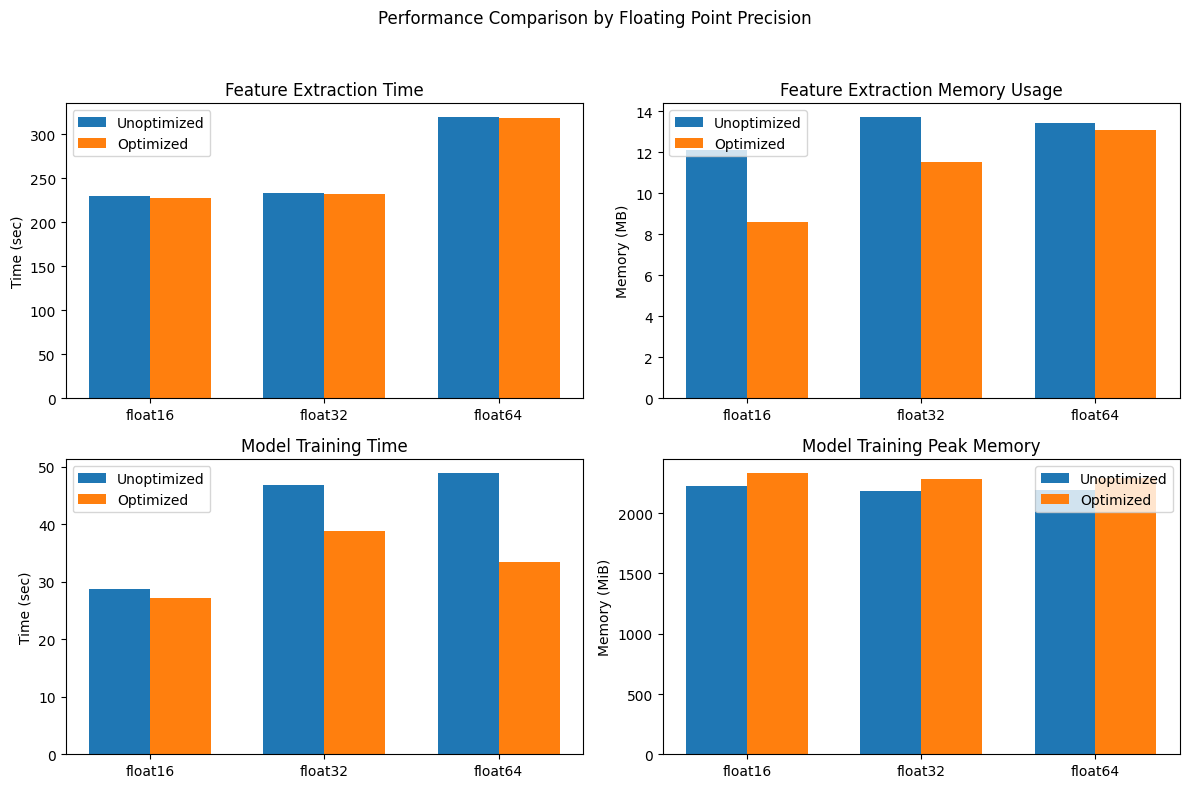

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
precisions = ['float16', 'float32', 'float64']

# Feature extraction times (seconds)
feature_time_optimized = [227.68, 231.94, 318.57]
feature_time_unoptimized = [230.45, 232.87, 319.35]

# Feature extraction memory usage (MB)
feature_mem_optimized = [8.57, 11.50, 13.09]
feature_mem_unoptimized = [12.09, 13.69, 13.43]

# Model training time (seconds)
train_time_optimized = [27.09, 38.76, 33.43]
train_time_unoptimized = [28.67, 46.77, 48.83]

# Model training memory usage (MiB)
train_mem_optimized = [2330.43, 2280.34, 2289.59]
train_mem_unoptimized = [2223.73, 2187.30, 2193.39]

x = np.arange(len(precisions))
width = 0.35  # Bar width

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Performance Comparison by Floating Point Precision')

# Feature extraction time
axs[0, 0].bar(x - width/2, feature_time_unoptimized, width, label='Unoptimized')
axs[0, 0].bar(x + width/2, feature_time_optimized, width, label='Optimized')
axs[0, 0].set_title('Feature Extraction Time')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(precisions)
axs[0, 0].set_ylabel('Time (sec)')
axs[0, 0].legend()

# Feature extraction memory
axs[0, 1].bar(x - width/2, feature_mem_unoptimized, width, label='Unoptimized')
axs[0, 1].bar(x + width/2, feature_mem_optimized, width, label='Optimized')
axs[0, 1].set_title('Feature Extraction Memory Usage')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(precisions)
axs[0, 1].set_ylabel('Memory (MB)')
axs[0, 1].legend()

# Model training time
axs[1, 0].bar(x - width/2, train_time_unoptimized, width, label='Unoptimized')
axs[1, 0].bar(x + width/2, train_time_optimized, width, label='Optimized')
axs[1, 0].set_title('Model Training Time')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(precisions)
axs[1, 0].set_ylabel('Time (sec)')
axs[1, 0].legend()

# Model training memory
axs[1, 1].bar(x - width/2, train_mem_unoptimized, width, label='Unoptimized')
axs[1, 1].bar(x + width/2, train_mem_optimized, width, label='Optimized')
axs[1, 1].set_title('Model Training Peak Memory')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(precisions)
axs[1, 1].set_ylabel('Memory (MiB)')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# import threading
# import librosa
# import numpy as np
# import pandas as pd

# X = []
# Y = []

# lock = threading.Lock()  # to prevent race conditions when appending

# def process_audio(row):
#     try:
#         features = get_features(row['Path'])
#         with lock:
#             X.append(features)
#             Y.append(row['Emotions'])
#     except Exception as e:
#         print(f"Failed to process {row['Path']}: {e}")

# threads = []

# # Limit number of threads running at the same time
# max_threads = 8
# active_threads = []

# for index, row in data_path.iterrows():
#     thread = threading.Thread(target=process_audio, args=(row,))
#     threads.append(thread)
#     thread.start()
#     active_threads.append(thread)

#     # Wait if too many threads are active
#     if len(active_threads) >= max_threads:
#         for t in active_threads:
#             t.join()
#         active_threads = []

# # Final join for any remaining threads
# for t in active_threads:
#     t.join()

# print("Feature extraction completed.")

/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Feature extraction completed.


In [54]:
len(X), len(Y), data_path.Path.shape

(7442, 7442, (7442,))

In [55]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.096987,0.536525,0.525088,0.532185,0.479693,0.505780,0.454048,0.534088,0.650836,0.739387,...,9.111197e-10,5.848524e-10,3.810983e-10,2.480924e-10,1.598740e-10,1.011542e-10,6.252870e-11,3.831653e-11,2.491402e-11,anger
1,0.045163,0.633982,0.620952,0.473804,0.473605,0.572384,0.571085,0.574901,0.604422,0.537580,...,5.789847e-07,5.359112e-07,5.052888e-07,4.824436e-07,4.654005e-07,4.531209e-07,4.441891e-07,4.383872e-07,4.347998e-07,anger
2,0.077379,0.474332,0.593344,0.558801,0.572850,0.550255,0.481050,0.466435,0.534983,0.592462,...,2.038428e-08,1.854323e-08,1.726264e-08,1.632536e-08,1.563455e-08,1.513767e-08,1.477836e-08,1.454320e-08,1.439995e-08,anger
3,0.066285,0.545859,0.643177,0.513738,0.423092,0.505263,0.636875,0.596005,0.512061,0.554377,...,3.632278e-10,3.272894e-10,3.034165e-10,2.865967e-10,2.746150e-10,2.662801e-10,2.603808e-10,2.567151e-10,2.544001e-10,anger
4,0.094360,0.483347,0.690071,0.597762,0.447791,0.437550,0.535759,0.621660,0.629653,0.599176,...,2.353860e-07,2.070463e-07,1.879488e-07,1.743632e-07,1.645572e-07,1.575780e-07,1.525889e-07,1.493287e-07,1.473576e-07,anger


In [56]:
features = get_features_optimized(data_path.Path.iloc[0])
print(f"Feature shape: {features.shape}")

Feature shape: (162,)


In [57]:
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5581, 162), (5581, 6), (1861, 162), (1861, 6))

In [59]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5581, 162), (5581, 6), (1861, 162), (1861, 6))

In [60]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5581, 162, 1), (5581, 6), (1861, 162, 1), (1861, 6))

In [63]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(units=6, activation='softmax', dtype='float32'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,222 (2.13 MB)

 Trainable params: 557,222 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_test, y_test), callbacks=[rlrp])


In [64]:
from memory_profiler import memory_usage
import time

# Define a small wrapper function
def train_model():
    rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=1e-7)
    history = model.fit(x_train, y_train, batch_size=64,  epochs=25,validation_data=(x_test, y_test),callbacks=[rlrp])
    return history

# Measure memory and time
start_time = time.time()

mem_usage, history = memory_usage((train_model, (), {}), retval=True)

end_time = time.time()

print(f"⏱ Time taken: {end_time - start_time:.2f} sec")
print(f"Peak memory usage: {max(mem_usage):.2f} MiB")

Epoch 1/25
 3/88 ━━━━━━━━━━━━━━━━━━━━ 34:10 24s/step - accuracy: 0.1536 - loss: 1.7878

Process MemTimer-2:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.11/dist-packages/memory_profiler.py", line 262, in run
    stop = self.pipe.poll(self.interval)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 440, in _poll
    r = wait([self], timeout)
        ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 948, in wait
    ready = selector.select(timeout)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
# Define a function to run model.fit
# rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
# def train_unoptimized():
#     history = model.fit(x_train, y_train, batch_size=64,  epochs=50,validation_data=(x_test, y_test),callbacks=[rlrp])
#     return history


# start_time = time.time()

# # mem_usage_opt, history_opt = memory_usage((train_unoptimized(),), retval=True)
# end_time = time.time()
# print(f"⏱ Time taken (unoptimized): {end_time - start_time:.2f} sec")
# print(f"Optimized Peak Memory: {max(mem_usage_opt):.2f} MiB")

# unopt_history = model.fit(x_train, y_train, batch_size=64,  epochs=25,validation_data=(x_test, y_test),callbacks=[rlrp])

# mem_usage_unopt = memory_usage((unopt_history,))
# print(f"Unoptimized Peak Memory: {max(mem_usage_unopt):.2f} MiB")

In [ ]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax', dtype='float32'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,222 (2.13 MB)

 Trainable params: 557,222 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
def train_model_opt():
    rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=1e-7)
    gc.collect()
    history = model.fit(x_train, y_train, batch_size=64,  epochs=10,validation_data=(x_test, y_test),callbacks=[rlrp])
    gc.collect()
    return history
# Measure memory and time
start_time = time.time()

mem_usage, history = memory_usage((train_model_opt, (), {}), retval=True)

end_time = time.time()

print(f"⏱ Time taken: {end_time - start_time:.2f} sec")
print(f"Peak memory usage: {max(mem_usage):.2f} MiB")

Epoch 1/10
 4/88 ━━━━━━━━━━━━━━━━━━━━ 34:35 25s/step - accuracy: 0.1911 - loss: 1.8081

Process MemTimer-1:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.11/dist-packages/memory_profiler.py", line 262, in run
    stop = self.pipe.poll(self.interval)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 440, in _poll
    r = wait([self], timeout)
        ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 948, in wait
    ready = selector.select(timeout)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 

Text(0.5, 1.0, 'Memory Usage Comparison')

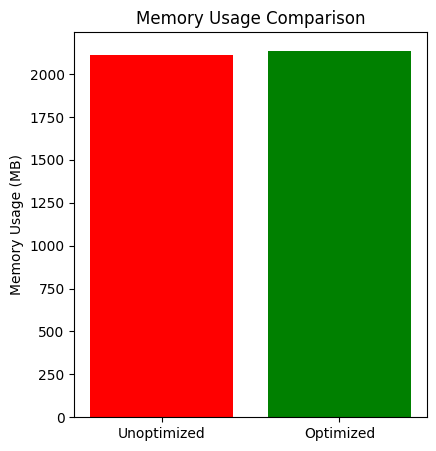

In [ ]:
memory_usage = [2112.52, 2137.16]
labels = ['Unoptimized', 'Optimized']

# Memory Usage Bar Plot
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.bar(labels, memory_usage, color=['red', 'green'])
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Comparison')

59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.4622 - loss: 1.3760
Accuracy of our model on test data :  46.963998675346375 %


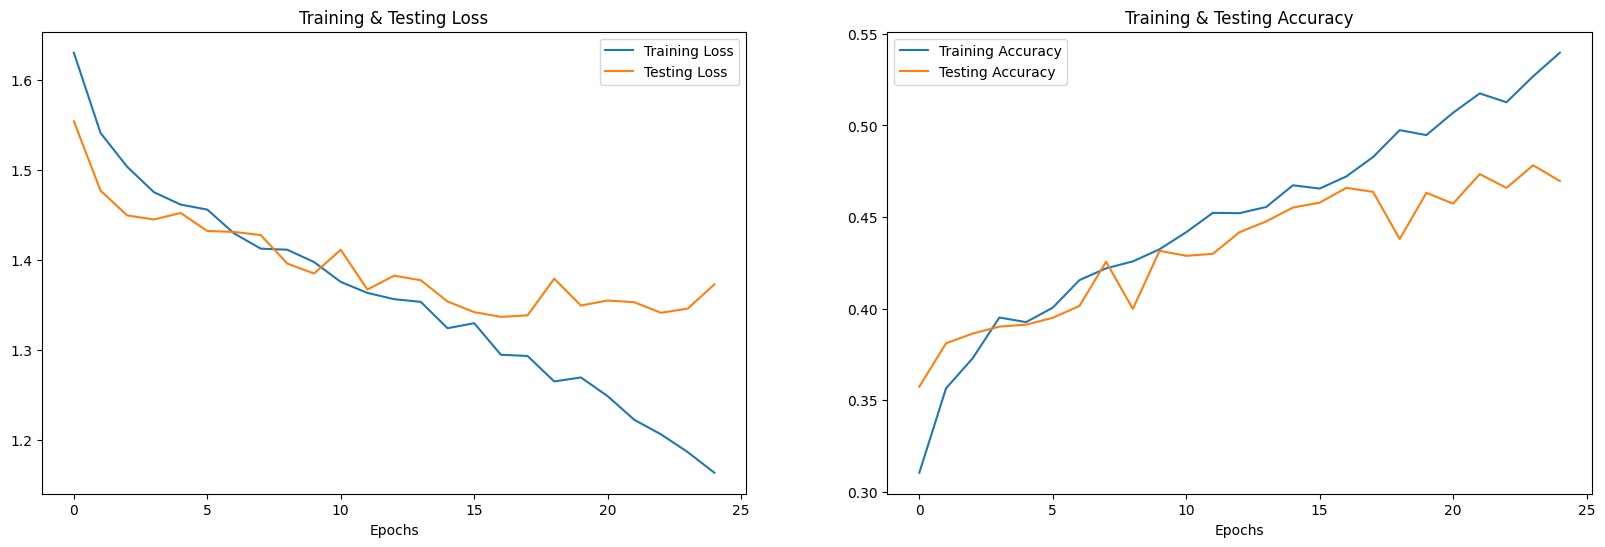

In [ ]:
# print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

# epochs = [i for i in range(25)]
# fig , ax = plt.subplots(1,2)
# train_acc = history_optimized.history['accuracy']
# train_loss = history_optimized.history['loss']
# test_acc = history_optimized.history['val_accuracy']
# test_loss = history_optimized.history['val_loss']

# fig.set_size_inches(20,6)
# ax[0].plot(epochs , train_loss , label = 'Training Loss')
# ax[0].plot(epochs , test_loss , label = 'Testing Loss')
# ax[0].set_title('Training & Testing Loss')
# ax[0].legend()
# ax[0].set_xlabel("Epochs")

# ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
# ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
# ax[1].set_title('Training & Testing Accuracy')
# ax[1].legend()
# ax[1].set_xlabel("Epochs")
# plt.show()

In [ ]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,happy,anger
1,fear,happy
2,neutral,neutral
3,anger,anger
4,sad,sad
5,anger,happy
6,anger,fear
7,neutral,happy
8,sad,sad
9,disgust,anger


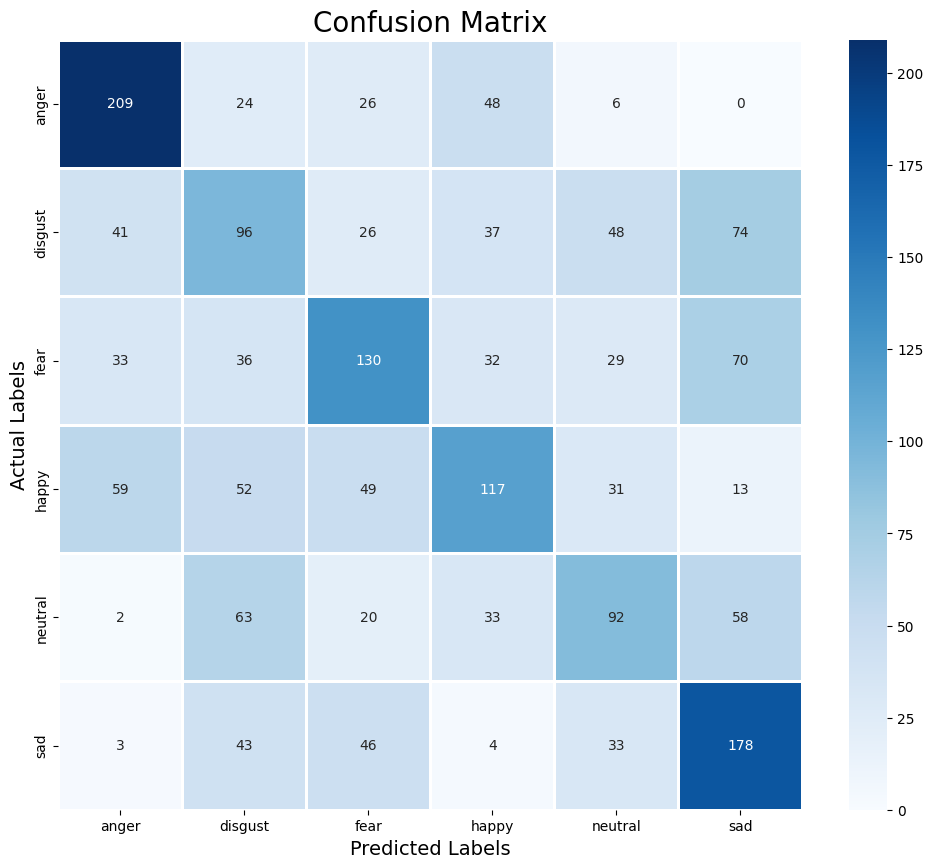

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.60      0.67      0.63       313
     disgust       0.31      0.30      0.30       322
        fear       0.44      0.39      0.41       330
       happy       0.43      0.36      0.40       321
     neutral       0.38      0.34      0.36       268
         sad       0.45      0.58      0.51       307

    accuracy                           0.44      1861
   macro avg       0.44      0.44      0.44      1861
weighted avg       0.44      0.44      0.44      1861

